In [51]:
import pandas as pd
from PIL import Image, ImageColor
import os
import numpy as np

data_path = './HW3_Q7_Dataset/Q6_Dataset/Images/'

In [52]:
samples = []
file_names = os.listdir(data_path)

for f in file_names:
    img = Image.open(os.path.join(data_path, f))
    img = np.array(img)    
    samples.append([np.mean(img[:, :, 0]), np.mean(img[:, :, 2]), int(f[0] == 'b')])
                   
data = pd.DataFrame(samples, columns=['red', 'blue', 'class'])                   

In [53]:
data

,red,blue,class
0,94.314015,83.835450,0
1,102.897665,73.075267,0
2,65.111383,74.571119,0
3,157.133690,82.574028,0
4,95.693808,77.880597,0
...,...,...,...
117,149.948049,100.986440,0
118,171.011949,188.238031,0
119,124.080669,62.128454,0
120,152.855040,101.028829,0


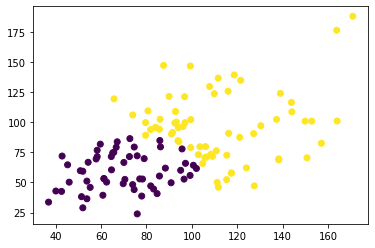

In [54]:
X = data[['red', 'blue']]
y = data['class']

from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt

gmm = GMM(n_components=2).fit(X)
labels = gmm.predict(X)
plt.scatter(X['red'], X['blue'], c=labels);

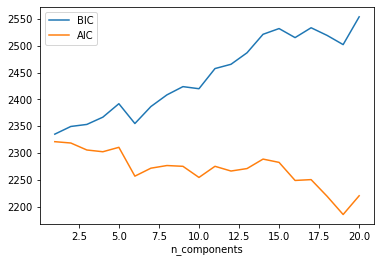

In [56]:
n_components = np.arange(1, 21)

models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');